In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [15]:
dataset = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header = 1)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [22]:
#data cleaning
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [23]:
dataset.loc[:122,'region']=0
dataset.loc[122:,'region']=1
df = dataset

In [27]:
df[['region']] = df[['region']].astype(int)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  region       246 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.0+ KB


day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
region         0
dtype: int64

In [29]:
# removing null values
df = df.dropna().reset_index(drop=True)
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [32]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [34]:
df = df.drop(122).reset_index(drop=True)
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1


In [35]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [36]:
# fix spaces in column names
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [37]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          242 non-null    int32 
 1   month        242 non-null    int32 
 2   year         242 non-null    int32 
 3   Temperature  242 non-null    int32 
 4   RH           242 non-null    int32 
 5   Ws           242 non-null    int32 
 6   Rain         242 non-null    object
 7   FFMC         242 non-null    object
 8   DMC          242 non-null    object
 9   DC           242 non-null    object
 10  ISI          242 non-null    object
 11  BUI          242 non-null    object
 12  FWI          242 non-null    object
 13  Classes      242 non-null    object
 14  region       242 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 21.9+ KB


In [40]:
objects= [features for features in df.columns if df[features].dtypes=='O']

for i in objects:
  if i != 'Classes':
    df[i] = df[i].astype(float)

df.info()    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int32  
 1   month        242 non-null    int32  
 2   year         242 non-null    int32  
 3   Temperature  242 non-null    int32  
 4   RH           242 non-null    int32  
 5   Ws           242 non-null    int32  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  region       242 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 21.9+ KB


In [41]:
# saving dataset after cleaning
df.to_csv('Algeria_cleaned.csv',index=False)

In [46]:
#drop columns day month year
df_copy = df.drop(['day','month','year'],axis=1)

In [47]:
# encoding the category in classes
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [48]:
df_copy['Classes'].value_counts()

Classes
1    137
0    105
Name: count, dtype: int64

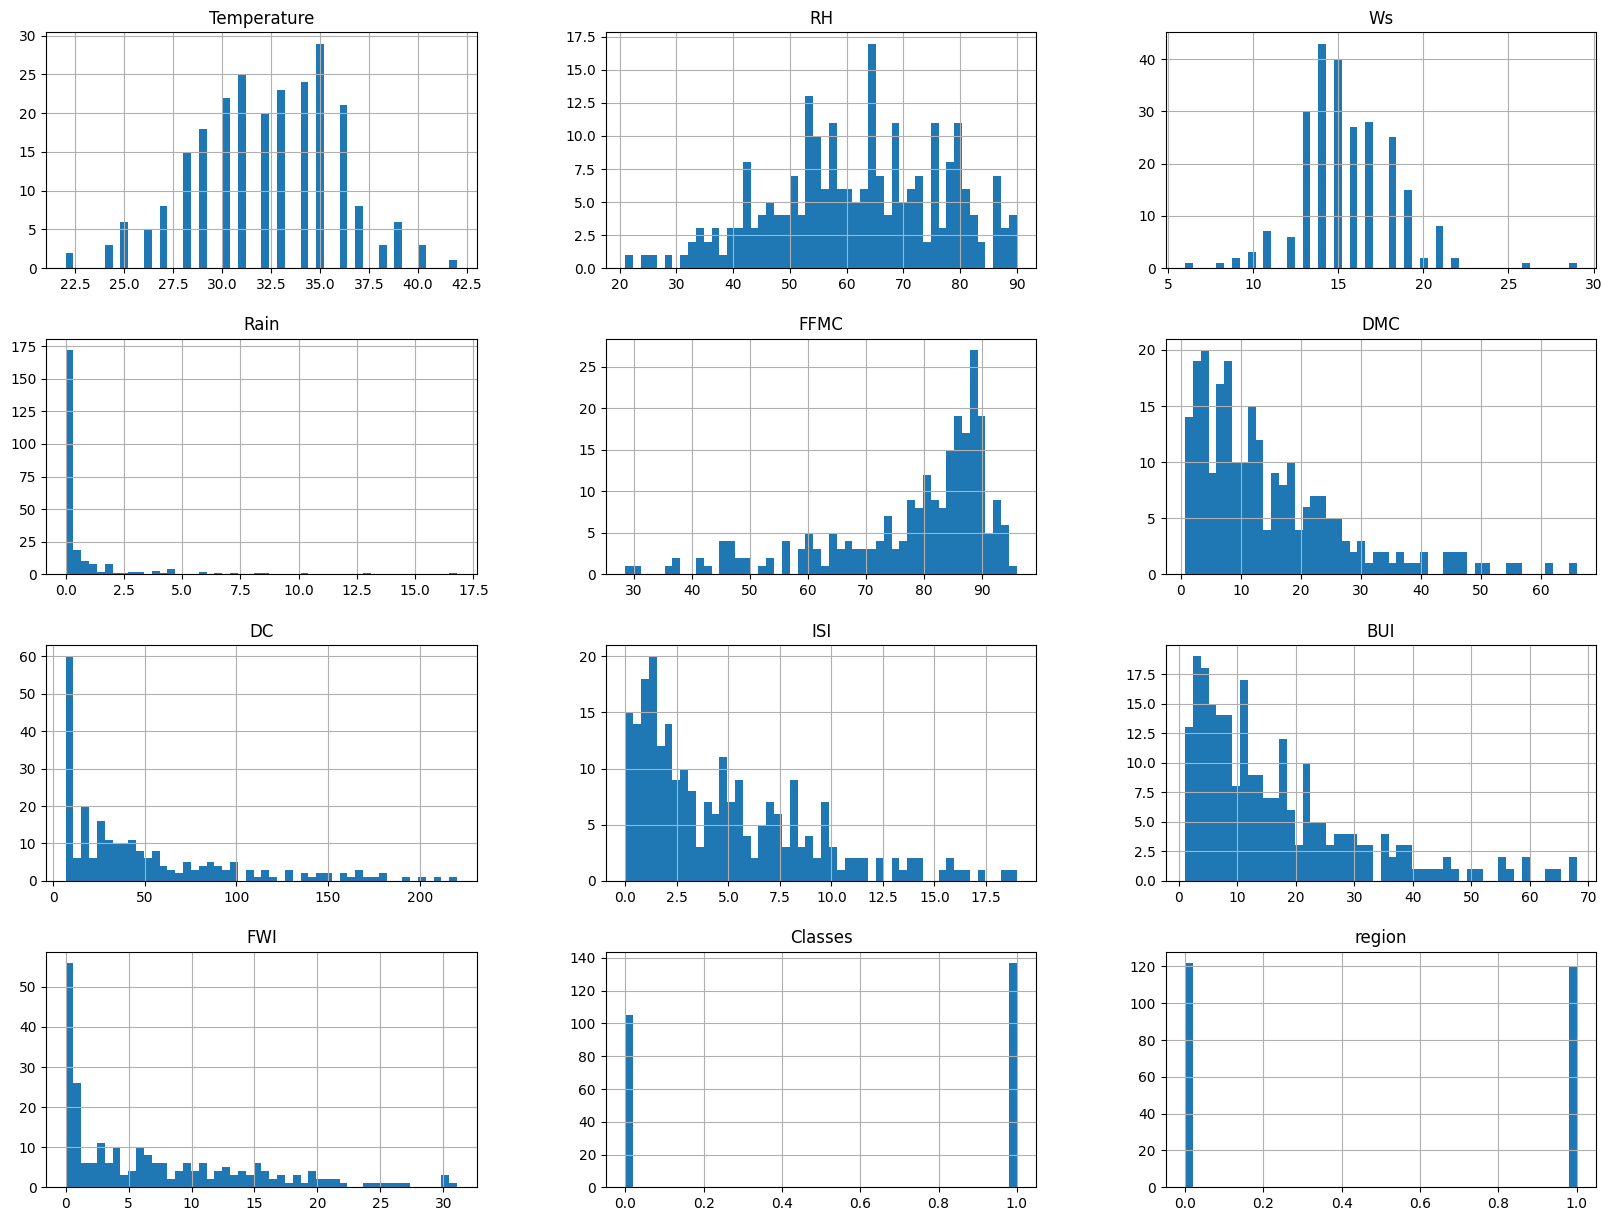

In [50]:

df_copy.hist(bins=50,figsize=(20,15))
plt.show()

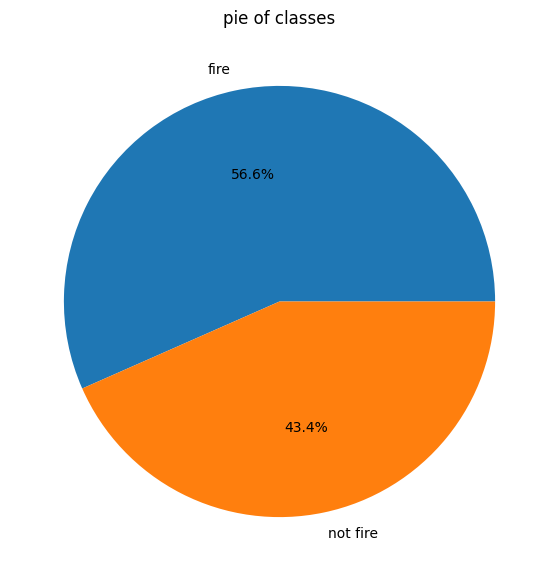

In [52]:
# percentages of piechart
percent = df_copy['Classes'].value_counts(normalize=True)*100

classlabels = ['fire','not fire']
plt.figure(figsize=(12,7))
plt.pie(percent,labels=classlabels,autopct='%1.1f%%')
plt.title('pie of classes')
plt.show()

In [53]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.651791,-0.285644,-0.326499,0.679270,0.486494,0.376720,0.604948,0.460533,0.567506,0.517203,0.270295
RH,-0.651791,1.000000,0.248148,0.222604,-0.644536,-0.407180,-0.225293,-0.686103,-0.352357,-0.580109,-0.430794,-0.406348
Ws,-0.285644,0.248148,1.000000,0.171896,-0.175324,-0.005819,0.075031,0.003408,0.026542,0.027768,-0.076262,-0.176928
Rain,-0.326499,0.222604,0.171896,1.000000,-0.546470,-0.289482,-0.298600,-0.348334,-0.300574,-0.325112,-0.380263,-0.039965
FFMC,0.679270,-0.644536,-0.175324,-0.546470,1.000000,0.601527,0.505185,0.738754,0.589881,0.689822,0.768069,0.229726
DMC,0.486494,-0.407180,-0.005819,-0.289482,0.601527,1.000000,0.875511,0.679150,0.982178,0.875405,0.583760,0.196981
DC,0.376720,-0.225293,0.075031,-0.298600,0.505185,0.875511,1.000000,0.506897,0.941809,0.738663,0.509202,-0.075412
ISI,0.604948,-0.686103,0.003408,-0.348334,0.738754,0.679150,0.506897,1.000000,0.642650,0.922613,0.733978,0.268456
BUI,0.460533,-0.352357,0.026542,-0.300574,0.589881,0.982178,0.941809,0.642650,1.000000,0.857449,0.584762,0.093849
FWI,0.567506,-0.580109,0.027768,-0.325112,0.689822,0.875405,0.738663,0.922613,0.857449,1.000000,0.718067,0.201695


<Axes: >

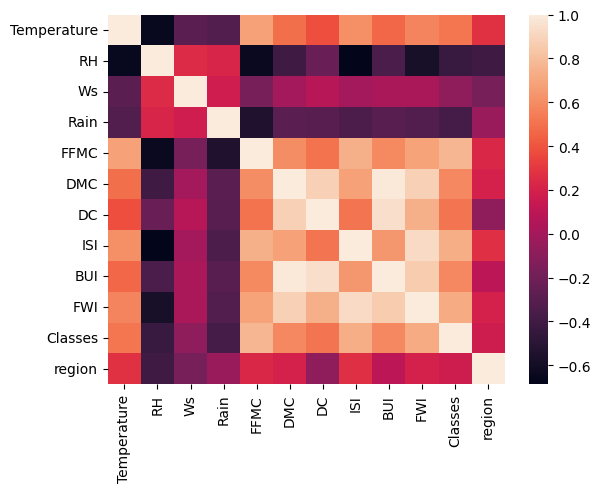

In [55]:
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

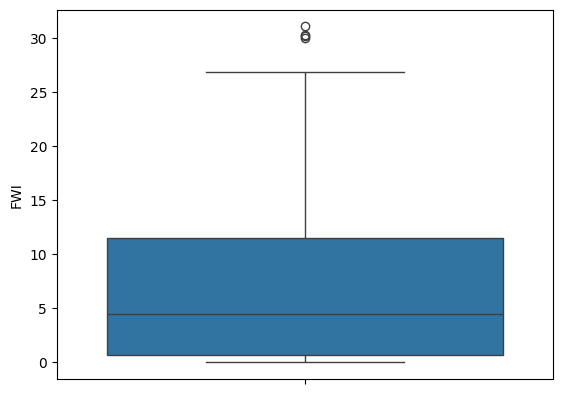

In [57]:
sns.boxplot(df_copy['FWI'])

<Axes: xlabel='month', ylabel='count'>

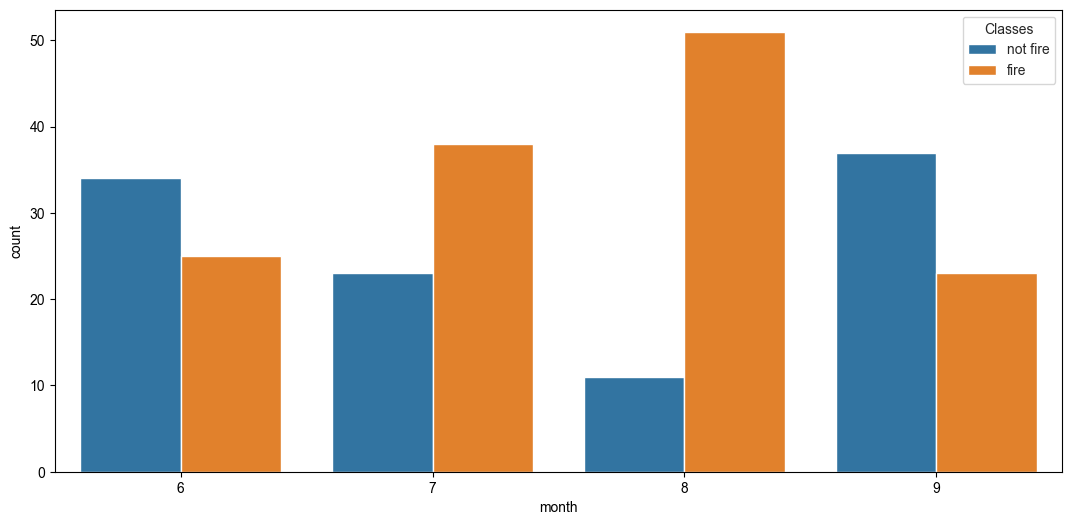

In [58]:
# monthly fire analysis
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),'not fire','fire')
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)

it is observed that most fires were occuring in the month of august while less in june and september
